# 피마 인디언 당뇨병 예측

## 1. 피마 인디언 당뇨병 데이터
|column명|의미|
|:---:|:---:|
|Pregnancies|임신 횟수|
|Glucose|포도당 부하 검사 수치|
|BloodPressure|혈압(mm Hg)|
|SkinThickness|팔 삼두근 뒤쪽의 피하지방 측정값(mm)|
|Insulin|혈청 인슐린(mu U/ml)|
|BMI|체질량 지수(체중(kg)/키(m)²)|
|DiabetesPedigreeFunction|당뇨 내력 가중치 값|
|Age|나이|
|Outcomes|클래스 결정 값(0 or 1)|

## 2. 데이터 전처리

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Binarizer

## 2.1 데이터 로딩

In [26]:
diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


### 2.2. 데이터 크기, 자료형 및 결손값 확인

In [27]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## 3. 학습/예측

### 3.1. 피처/레이블 데이터 분리

In [28]:
# 피처 데이터 세트 x, 레이블 데이터 세트 y 추출
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

### 3.2. 학습/테스트 데이터 분리

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

### 3.3. 학습 및 예측

In [30]:
# 정확도, 정밀도, 재현율, F1 스코어, 오차 행렬을 계산하는 함수
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    print('오차 행렬 : ')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall, f1, roc_score))

In [31]:
# 로지스틱 회귀로 학습/예측/평가
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬 : 
[[87 13]
 [22 32]]
정확도 : 0.7727, 정밀도 : 0.7111, 재현율 : 0.5926, F1 : 0.6465, AUC : 0.7313


C:\Users\round\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 4. 임계값 조절
### 4.1. 임계값별 정밀도와 재현율

In [32]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # x축 threshold, y축 정밀도(점선)/재현율(실선)
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold값인 x축의 단위를 0.1로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축, label, legend, grid 설정
    plt.xlabel('Threshold Value')
    plt.ylabel('Precision and Recall Value')
    plt.legend()     # Label명 출력
    plt.grid()       # 그리드
    plt.show()

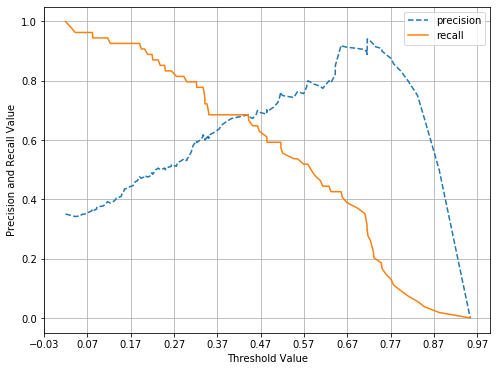

In [33]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

정밀도와 재현율이 둘 다 어느정도 높은 0.42에서 정밀도와 재현율의 값은 0.7이 조금 안 될 정도로 **낮은 편**이다.   

### 4.2. 데이터 분포도 
한 번 데이터의 분포도를 살펴보자.

In [34]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

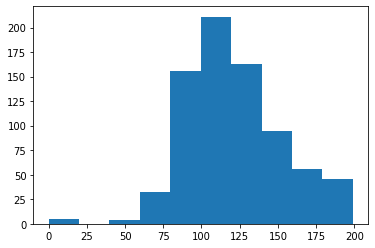

In [35]:
plt.hist(diabetes_data['Glucose'], bins=10)

데이터의 최소값이 0으로 되어 있는 피처가 상당히 많다. 포도당 수치가 절대 0일 수가 없는데 Glucose 피처를 보면 0값이 어느 정도 존재함을 알 수 있다.    
그러므로 `min()`이 0으로 되어 있는 피처에 대해 **0값이 전체 데이터 수 대비 얼마나 존재하는지** 계산해보자.

In [36]:
# 0값을 검사할 피처 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 수
total_cnt = diabetes_data['Glucose'].count()

# 피처 별로 반복하면서 데이터 값이 0인 데이터 개수를 세서 퍼센트 계산
for feature in zero_features:
    zero_cnt = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} : 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_cnt, 100*zero_cnt/total_cnt))

Glucose : 0 건수는 5, 퍼센트는 0.65%
BloodPressure : 0 건수는 35, 퍼센트는 4.56%
SkinThickness : 0 건수는 227, 퍼센트는 29.56%
Insulin : 0 건수는 374, 퍼센트는 48.70%
BMI : 0 건수는 11, 퍼센트는 1.43%


### 4.3. 데이터 대체 및 스케일링
0의 비율이 높은 피처가 있기에 단순히 데이터를 없애기에는 학습을 효과적으로 할 수 없으므로 **0값들을 평균값으로 대체**한다.

In [37]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해 0을 평균값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features)

In [38]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

# StandardScaler를 이용한 일괄적 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify=y)

# 로지스틱 회귀로 학습/예측/평가
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬 : 
[[90 10]
 [21 33]]
정확도 : 0.7987, 정밀도 : 0.7674, 재현율 : 0.6111, F1 : 0.6804, AUC : 0.7556


C:\Users\round\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 4.4. 임계값 조절
임계값이 `0.48`일 때, 정확도는 `0.7987`, 정밀도는 `0.7447`, 재현율은 `0.6481`, F1 스코어는 `0.6931`, ROC AUC는 `0.7641`로 성능이 가장 좋다.

In [39]:
# 임계값을 설정하고 정확도, 정밀도, 재현율, 오차행렬을 계산
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds 리스트 내의 값을 차례로 iteration하면서 평가
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_pred = binarizer.transform(pred_proba_c1)
        print('임계값 : ', custom_threshold)
        get_clf_eval(y_test, custom_pred)
        print()

In [40]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임계값 :  0.3
오차 행렬 : 
[[65 35]
 [11 43]]
정확도 : 0.7013, 정밀도 : 0.5513, 재현율 : 0.7963, F1 : 0.6515, AUC : 0.7231

임계값 :  0.33
오차 행렬 : 
[[71 29]
 [11 43]]
정확도 : 0.7403, 정밀도 : 0.5972, 재현율 : 0.7963, F1 : 0.6825, AUC : 0.7531

임계값 :  0.36
오차 행렬 : 
[[76 24]
 [15 39]]
정확도 : 0.7468, 정밀도 : 0.6190, 재현율 : 0.7222, F1 : 0.6667, AUC : 0.7411

임계값 :  0.39
오차 행렬 : 
[[78 22]
 [16 38]]
정확도 : 0.7532, 정밀도 : 0.6333, 재현율 : 0.7037, F1 : 0.6667, AUC : 0.7419

임계값 :  0.42
오차 행렬 : 
[[84 16]
 [18 36]]
정확도 : 0.7792, 정밀도 : 0.6923, 재현율 : 0.6667, F1 : 0.6792, AUC : 0.7533

임계값 :  0.45
오차 행렬 : 
[[85 15]
 [18 36]]
정확도 : 0.7857, 정밀도 : 0.7059, 재현율 : 0.6667, F1 : 0.6857, AUC : 0.7583

임계값 :  0.48
오차 행렬 : 
[[88 12]
 [19 35]]
정확도 : 0.7987, 정밀도 : 0.7447, 재현율 : 0.6481, F1 : 0.6931, AUC : 0.7641

임계값 :  0.5
오차 행렬 : 
[[90 10]
 [21 33]]
정확도 : 0.7987, 정밀도 : 0.7674, 재현율 : 0.6111, F1 : 0.6804, AUC : 0.7556



In [41]:
# 임계값을 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

# 변환된 예측 결과 확률 배열의 Positive에 해당하는 열을 Binarizer에 적용
pred_th_48 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))

get_clf_eval(y_test, pred_th_48)

오차 행렬 : 
[[88 12]
 [19 35]]
정확도 : 0.7987, 정밀도 : 0.7447, 재현율 : 0.6481, F1 : 0.6931, AUC : 0.7641
